Доходы от продаж, полученных в результате рекламной компании по ТВ, радио, газетам.

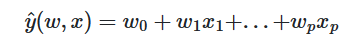

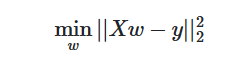

In [1]:
%pip install yellowbrick pandas seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
print("libraries imported..")

libraries imported..


In [2]:
df = pd.read_csv("Advertising.csv")
df.drop(df.columns[[0]], axis = 1, inplace = True) 
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [34]:
#Задачи: Линейная регрессия
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
# Вывести значения коэффициентов модели.
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha.
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

In [ ]:
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
# Вывести значения коэффициентов модели.
y = df.sales

models = {
    "Model 1 (All features)": df[['TV', 'radio', 'newspaper']],  # Все входные переменные
    "Model 2 (Two features)": df[['TV', 'radio']],               # Две входные переменные
    "Model 3 (One feature)": df[['TV']]                          # Одна входная переменная
}

for model_name, X in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    print(f"{model_name}:")
    print("Коэффициенты модели:", lr_model.coef_)
    print("Свободный член (intercept):", lr_model.intercept_)
    print("Mean Squared Error (MSE):", mse)
    print("-" * 50)

Model 1 (All features):
Коэффициенты модели: [0.04656457 0.17915812 0.00345046]
Свободный член (intercept): 2.8769666223179318
Mean Squared Error (MSE): 1.9730456202283397
--------------------------------------------------
Model 2 (Two features):
Коэффициенты модели: [0.04660234 0.18117959]
Свободный член (intercept): 2.9272373202664816
Mean Squared Error (MSE): 1.9262760418667428
--------------------------------------------------
Model 3 (One feature):
Коэффициенты модели: [0.04802945]
Свободный член (intercept): 6.9119726188687185
Mean Squared Error (MSE): 10.310069587813155
--------------------------------------------------


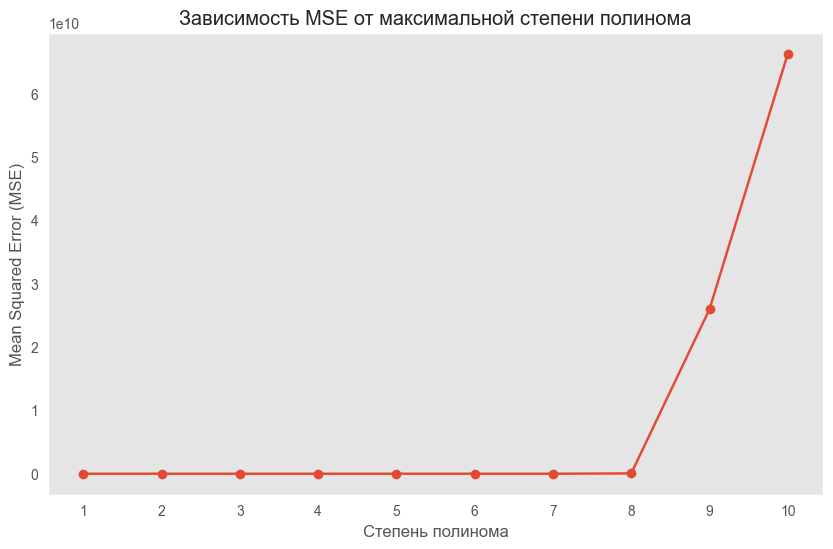

Степень полинома 1: MSE = 1.9730
Степень полинома 2: MSE = 0.2437
Степень полинома 3: MSE = 0.1789
Степень полинома 4: MSE = 0.3138
Степень полинома 5: MSE = 2.7228
Степень полинома 6: MSE = 498.4171
Степень полинома 7: MSE = 43612.0631
Степень полинома 8: MSE = 49915316.4750
Степень полинома 9: MSE = 25955735162.0759
Степень полинома 10: MSE = 66260592172.1620


In [ ]:
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)
mse_values = []

max_pow = 10
for degree in range(1, max_pow + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[['TV', 'radio', 'newspaper']])

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_pow + 1), mse_values, marker='o')
plt.title('Зависимость MSE от максимальной степени полинома')
plt.xlabel('Степень полинома')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, max_pow + 1))
plt.grid()
plt.show()

for degree, mse in zip(range(1, max_pow + 1), mse_values):
    print(f"Степень полинома {degree}: MSE = {mse:.4f}")

c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.91827e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.26808e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61253e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02599e-31): result may not be accurate.
  return linalg.solve

Оптимальная степень полинома: 4


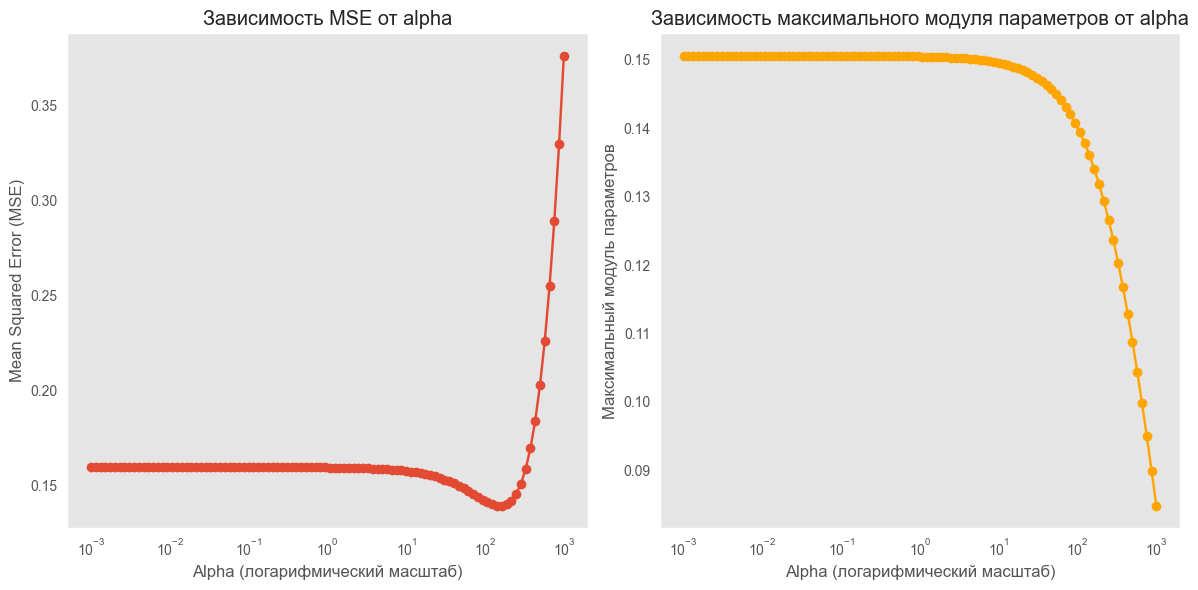

In [10]:
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha.

max_degree = 10
mse_values = []

for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[['TV', 'radio', 'newspaper']])

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)

    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

optimal_degree = np.argmin(mse_values) + 1 

print(f"Оптимальная степень полинома: {optimal_degree}")

alphas = np.logspace(-3, 3, 100) 
mse_alpha_values = []
max_param_values = []

poly = PolynomialFeatures(degree=optimal_degree)
X_poly_optimal = poly.fit_transform(df[['TV', 'radio', 'newspaper']])
X_train, X_test, y_train, y_test = train_test_split(X_poly_optimal, y, random_state=1)

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_alpha_values.append(mse)

    max_param_values.append(np.max(np.abs(ridge_model.coef_)))

plt.figure(figsize=(12, 6))

# График зависимости MSE от alpha
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_alpha_values, marker='o')
plt.xscale('log')
plt.title('Зависимость MSE от alpha')
plt.xlabel('Alpha (логарифмический масштаб)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid()

# График зависимости максимального модуля параметров от alpha
plt.subplot(1, 2, 2)
plt.plot(alphas, max_param_values, marker='o', color='orange')
plt.xscale('log')
plt.title('Зависимость максимального модуля параметров от alpha')
plt.xlabel('Alpha (логарифмический масштаб)')
plt.ylabel('Максимальный модуль параметров')
plt.grid()

plt.tight_layout()
plt.show()

c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+01, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.972e+01, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Оптимальная степень полинома: 3


c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.494e+01, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+01, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\usicc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

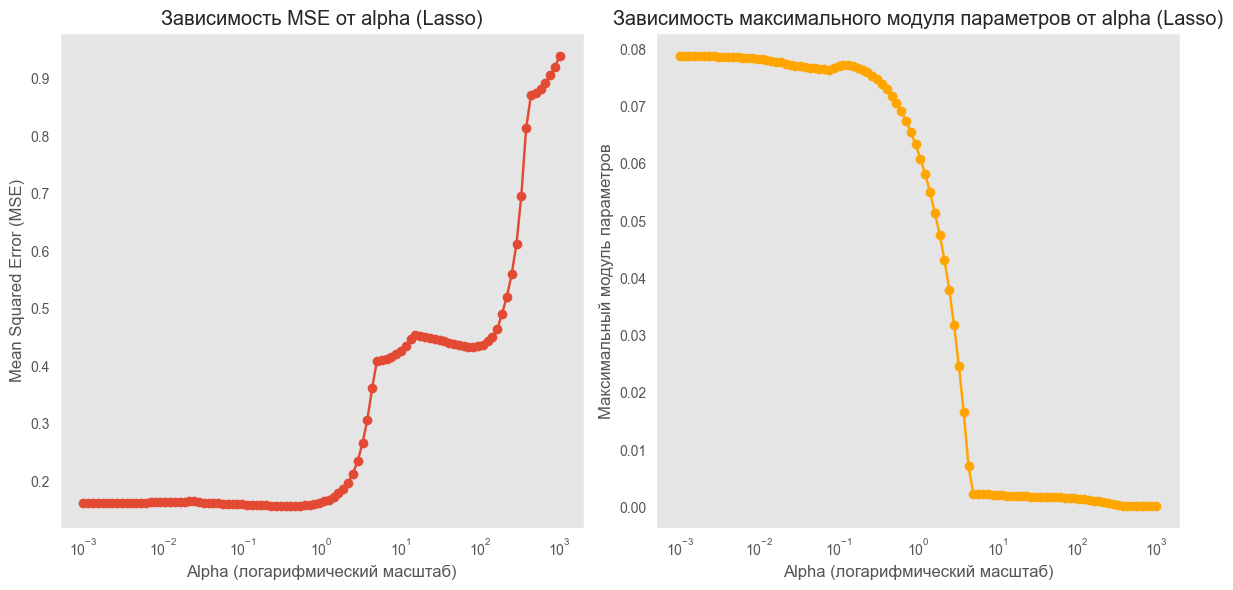

Alpha: 1.0000e-03, MSE: 0.1631, Max Coefficient: 0.0789
Alpha: 1.1498e-03, MSE: 0.1631, Max Coefficient: 0.0789
Alpha: 1.3219e-03, MSE: 0.1631, Max Coefficient: 0.0789
Alpha: 1.5199e-03, MSE: 0.1631, Max Coefficient: 0.0788
Alpha: 1.7475e-03, MSE: 0.1631, Max Coefficient: 0.0788
Alpha: 2.0092e-03, MSE: 0.1632, Max Coefficient: 0.0788
Alpha: 2.3101e-03, MSE: 0.1632, Max Coefficient: 0.0788
Alpha: 2.6561e-03, MSE: 0.1632, Max Coefficient: 0.0788
Alpha: 3.0539e-03, MSE: 0.1632, Max Coefficient: 0.0787
Alpha: 3.5112e-03, MSE: 0.1633, Max Coefficient: 0.0787
Alpha: 4.0370e-03, MSE: 0.1633, Max Coefficient: 0.0787
Alpha: 4.6416e-03, MSE: 0.1634, Max Coefficient: 0.0786
Alpha: 5.3367e-03, MSE: 0.1634, Max Coefficient: 0.0786
Alpha: 6.1359e-03, MSE: 0.1635, Max Coefficient: 0.0785
Alpha: 7.0548e-03, MSE: 0.1636, Max Coefficient: 0.0785
Alpha: 8.1113e-03, MSE: 0.1637, Max Coefficient: 0.0784
Alpha: 9.3260e-03, MSE: 0.1638, Max Coefficient: 0.0783
Alpha: 1.0723e-02, MSE: 0.1639, Max Coefficient:

In [12]:
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

max_degree = 10
mse_values = []

for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[['TV', 'radio', 'newspaper']])

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)

    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

optimal_degree = np.argmin(mse_values) + 1

print(f"Оптимальная степень полинома: {optimal_degree}")

alphas = np.logspace(-3, 3, 100) 
mse_alpha_values = []
max_param_values = []

poly = PolynomialFeatures(degree=optimal_degree)
X_poly_optimal = poly.fit_transform(df[['TV', 'radio', 'newspaper']])
X_train, X_test, y_train, y_test = train_test_split(X_poly_optimal, y, random_state=1)

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_alpha_values.append(mse)

    max_param_values.append(np.max(np.abs(lasso_model.coef_)))

plt.figure(figsize=(12, 6))

# График зависимости MSE от alpha
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_alpha_values, marker='o')
plt.xscale('log')
plt.title('Зависимость MSE от alpha (Lasso)')
plt.xlabel('Alpha (логарифмический масштаб)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid()

# График зависимости максимального модуля параметров от alpha
plt.subplot(1, 2, 2)
plt.plot(alphas, max_param_values, marker='o', color='orange')
plt.xscale('log')
plt.title('Зависимость максимального модуля параметров от alpha (Lasso)')
plt.xlabel('Alpha (логарифмический масштаб)')
plt.ylabel('Максимальный модуль параметров')
plt.grid()

plt.tight_layout()
plt.show()

for alpha, mse, max_param in zip(alphas, mse_alpha_values, max_param_values):
    print(f"Alpha: {alpha:.4e}, MSE: {mse:.4f}, Max Coefficient: {max_param:.4f}")

Полиномиальная модель:
Лучшие параметры: {'C': 10, 'degree': 2, 'epsilon': 1}
Mean Squared Error (MSE): 1.0719186427991962

Сигмоидная модель:
Лучшие параметры: {'C': 0.1, 'epsilon': 1, 'gamma': 'scale'}
Mean Squared Error (MSE): 26.74737533272774


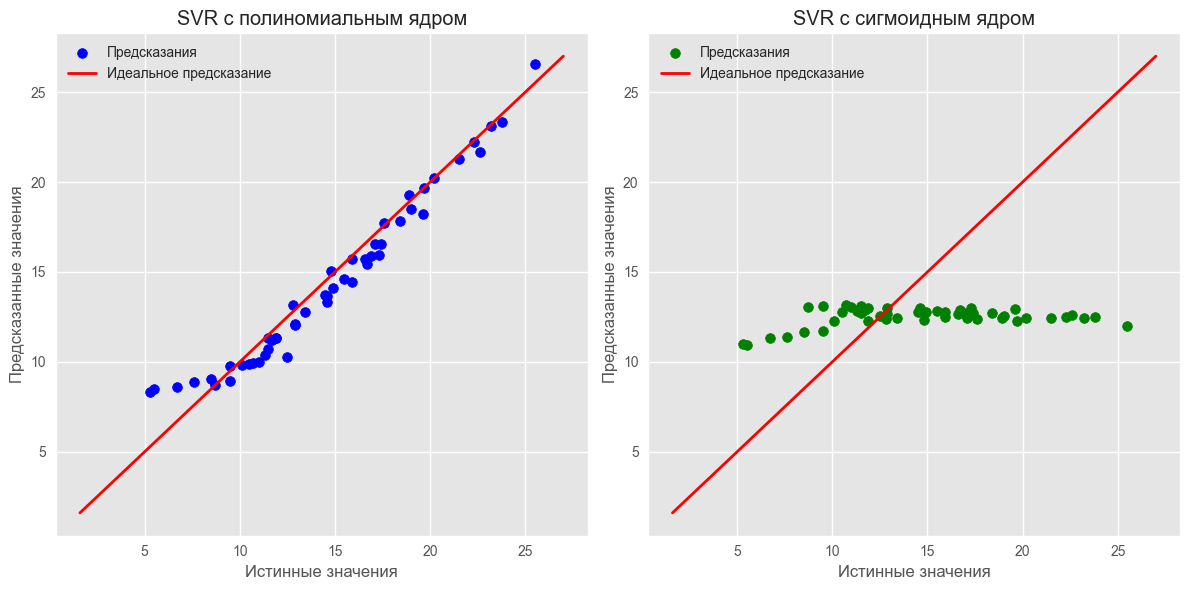

In [15]:
#SVR
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
# Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
# Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'degree': [1, 2, 3, 4, 5]  
}

param_grid_sigmoid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto'] 
}

svr_poly = SVR(kernel='poly')
grid_search_poly = GridSearchCV(svr_poly, param_grid_poly, cv=5)
grid_search_poly.fit(X_train, y_train)

best_model_poly = grid_search_poly.best_estimator_
y_pred_poly = best_model_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("Полиномиальная модель:")
print("Лучшие параметры:", grid_search_poly.best_params_)
print("Mean Squared Error (MSE):", mse_poly)

svr_sigmoid = SVR(kernel='sigmoid')
grid_search_sigmoid = GridSearchCV(svr_sigmoid, param_grid_sigmoid, cv=5)
grid_search_sigmoid.fit(X_train, y_train)

best_model_sigmoid = grid_search_sigmoid.best_estimator_
y_pred_sigmoid = best_model_sigmoid.predict(X_test)
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)

print("\nСигмоидная модель:")
print("Лучшие параметры:", grid_search_sigmoid.best_params_)
print("Mean Squared Error (MSE):", mse_sigmoid)

plt.figure(figsize=(12, 6))

# Полиномиальная модель
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_poly, color='blue', label='Предсказания')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Идеальное предсказание')
plt.title('SVR с полиномиальным ядром')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.legend()

# Сигмоидная модель
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sigmoid, color='green', label='Предсказания')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Идеальное предсказание')
plt.title('SVR с сигмоидным ядром')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.legend()

plt.tight_layout()
plt.show()